In [2]:
#importing dependencies

import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
l1 = l2 = l3 = 7

In [4]:
## Generating dataset for training

def three_link_manipulator_dataset():
    rows = []
    for i in range(1, 100000):
        theta1 = round(random.uniform(0, math.pi), 2)
        theta2 = round(random.uniform(-math.pi, 0), 2)
        theta3 = round(random.uniform(-math.pi/2, math.pi/2), 2)
        
        x = round(l1*math.cos(theta1)+l2*math.cos(theta1+theta2)+l3*math.cos(theta1+theta2+theta3), 2)
        y = round(l1*math.sin(theta1)+l2*math.sin(theta1+theta2)+l3*math.sin(theta1+theta2+theta3), 2)
        phi = round(math.degrees(theta1)+math.degrees(theta2)+math.degrees(theta3), 2)
        
        rows.append([theta1, theta2, theta3, x, y, phi])

    df = pd.DataFrame(rows, columns=['theta1', 'theta2', 'theta3', 'x', 'y', 'phi'])
    df.to_csv('three_link.csv', index=False)
    
three_link_manipulator_dataset()

In [5]:
three_link_data = pd.read_csv('three_link.csv')
three_link_data.head()

,theta1,theta2,theta3,x,y,phi
0,1.33,-0.11,-0.82,10.52,16.10,22.92
1,0.27,-1.72,-0.79,3.25,-10.57,-128.34
2,1.82,-1.70,-0.48,11.77,5.16,-20.63
3,2.71,-1.93,-0.38,5.07,10.58,22.92
4,0.12,-0.17,1.19,16.86,6.85,65.32


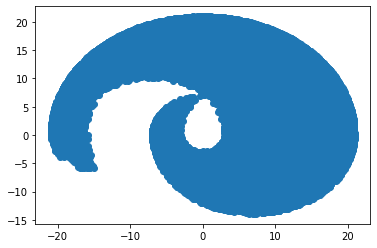

In [6]:
plt.scatter(three_link_data['x'], three_link_data['y'])
plt.show()

In [7]:
# Splitting training and testing dataset
X = three_link_data[['x', 'y', 'phi']]
y = three_link_data[['theta1', 'theta2', 'theta3']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)

In [8]:
# Defining model

model = models.Sequential()
model.add(layers.Dense(units=3, input_dim=3, kernel_initializer='uniform'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(layers.Dense(units=3, kernel_initializer = 'uniform', activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 10,815
Trainable params: 10,815
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [10]:
# Training model
history = model.fit(train_X, train_y, epochs=30, validation_split=0.1, shuffle=True)

Epoch 1/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.4382 - accuracy: 0.9025 - val_loss: 0.0455 - val_accuracy: 0.9588
Epoch 2/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.0429 - accuracy: 0.9640 - val_loss: 0.0358 - val_accuracy: 0.9648
Epoch 3/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.0311 - accuracy: 0.9701 - val_loss: 0.0283 - val_accuracy: 0.9753
Epoch 4/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.0260 - accuracy: 0.9741 - val_loss: 0.0210 - val_accuracy: 0.9750
Epoch 5/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.0241 - accuracy: 0.9765 - val_loss: 0.0264 - val_accuracy: 0.9810
Epoch 6/30
2532/2532 [==============================] - 7s 3ms/step - loss: 0.0220 - accuracy: 0.9797 - val_loss: 0.0216 - val_accuracy: 0.9823
Epoch 7/30
2532/2532 [==============================] - 8s 3ms/step - loss: 0.0203 - accuracy: 0.9794 - val_loss: 0.0243 - val_accuracy:

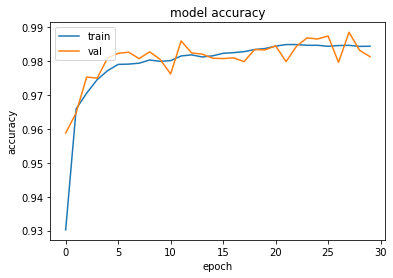

In [11]:
# Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

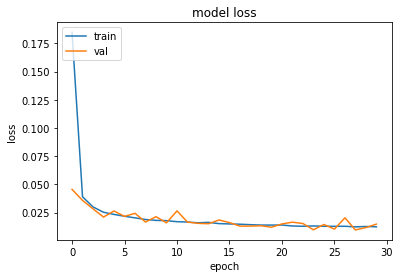

In [12]:
# Plotting model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# Evaluating the model on test set

test_loss, test_acc = model.evaluate(test_X, test_y)

print('\nTesting Loss = ', test_loss)
print('Testing Accuracy = ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 0.9810

Testing Loss =  0.015360100194811821
Testing Accuracy =  0.9810000061988831


In [17]:
def iiitm_dataset():
    rows = []

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for I
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for T
    arr = np.linspace(8.5, 10.5, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 9.5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    # for M
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 11
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((-y)+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = ((y)+19)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 13
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('iiitm.csv', index=False)
    
iiitm_dataset()

In [18]:
def three_link_forward_kinematics(theta1, theta2, theta3):
    x = (np.cos(theta1)*l1)+(np.cos(theta1+theta2)*l2)+(np.cos(theta1+theta2+theta3)*l3)
    y = (np.sin(theta1)*l1)+(np.sin(theta1+theta2)*l2)+(np.sin(theta1+theta2+theta3)*l3)

    return x, y

In [19]:
iiitm_data = pd.read_csv('iiitm.csv')
iiitm_predictions = model.predict(iiitm_data.values)
x_predictions, y_predictions = three_link_forward_kinematics(iiitm_predictions[:,0], iiitm_predictions[:,1], iiitm_predictions[:,2])

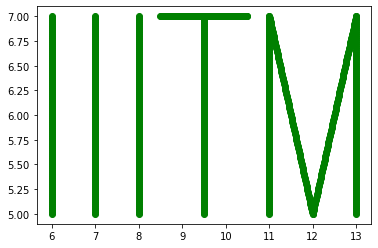

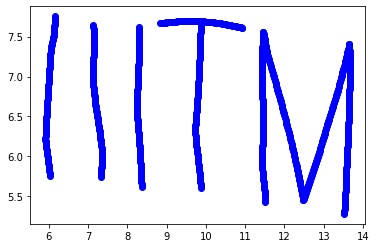

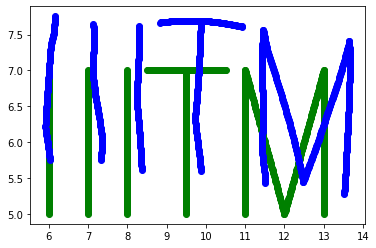

In [20]:
# Original
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.show()

# Predicted
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

# Original and Predicted
plt.plot(iiitm_data['x'], iiitm_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

In [107]:
def harsh_dataset():
    rows = []

    # for H
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(6,8,100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 8
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for A
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = (y+15)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(10.5, 11.5, 50)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = (-y+29)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for R
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 14
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(14, 16, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(6, 7, 100)
    for y in arr:
        x = 16
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(14, 16, 100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(5, 6, 100)
    for y in arr:
        x = (-3*y+46)/2
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    # for S
    arr = np.linspace(6, 7, 100)
    for y in arr:
        x = 18
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(18, 20, 100)
    for x in arr:
        y = 5
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(18, 20, 100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(18, 20, 100)
    for x in arr:
        y = 7
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    
    arr = np.linspace(5, 6, 100)
    for y in arr:
        x = 20
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
        
    # for H
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 22
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(22, 24, 100)
    for x in arr:
        y = 6
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])
    
    arr = np.linspace(5, 7, 100)
    for y in arr:
        x = 24
        theta = math.degrees(math.atan(y/x))
        rows.append([x, y, theta])

    df = pd.DataFrame(rows, columns=['x', 'y', 'theta'])
    df.to_csv('harsh.csv', index=False)
    
harsh_dataset()

In [112]:
harsh_data = pd.read_csv('harsh.csv')
harsh_predictions = model.predict(harsh_data.values)

x_predictions, y_predictions = three_link_forward_kinematics(harsh_predictions[:,0], harsh_predictions[:,1], harsh_predictions[:,2])

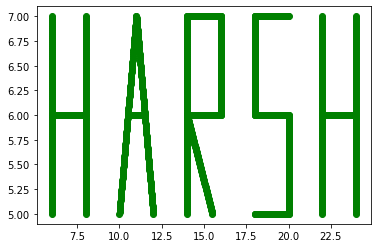

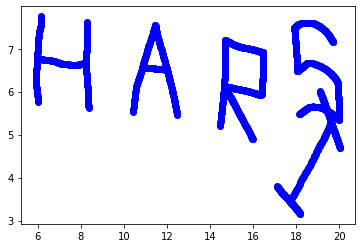

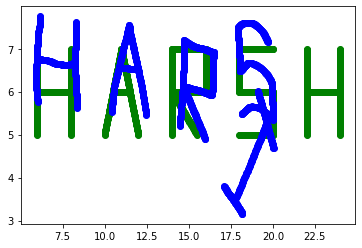

In [113]:
plt.plot(harsh_data['x'], harsh_data['y'], 'go')
plt.show()

plt.plot(x_predictions, y_predictions, 'bo')
plt.show()

plt.plot(harsh_data['x'], harsh_data['y'], 'go')
plt.plot(x_predictions, y_predictions, 'bo')
plt.show()